# Simular Cabo Umbilical

Este Jupyter Notebook (kernel `Python`) roda a simulação do cabo umbilical invocando o código julia. Os parâmetros são definidos no arquivo `parametros.csv` (inclusive o nome do arquivo no qual salvar os resultados) e a fonte de tensão de excitação no arquivo `v_fonte.txt`.

In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#dt = 2.5e-9
#nt = 100352 + 1024
#t = np.linspace(0, stop=dt * (nt - 1), num=nt)
#v_fonte = (np.tanh(0.22e9 * t - 2.75) + np.tanh(2.75)) / 2
#plt.plot(t[0:20], v_fonte[0:20])
#v_fonte += np.random.rand(nt)  # ruído
#with open("v_fonte.txt", "w") as io:
#    for i in range(nt):
#        io.write(str(v_fonte[i]) + "\n")

In [3]:
subprocess.run(["julia", "simular_cabo_server.jl"], check=True)

CompletedProcess(args=['julia', 'simular_cabo_server.jl'], returncode=0)

## Visualizar resultado da simulação

In [4]:
def tem_falha(data):
    falha_serie = any(pd.Series(data['R_falha_serie']).dropna().apply(lambda x : x > 0))
    falha_shunt = any(pd.Series(data['R_falha_shunt']).dropna().apply(lambda x : x > 0))
    return data['segmento_falha'][0] > 0 and (falha_serie or falha_shunt)

In [5]:
def viz_data(data):
    lb1 = "condutor"
    lb2 =  "blindagem"
    lb3 = "armadura"
    n = data.shape[0]
    x_ticks = data[data.columns[0]].iloc[0:n]
    has_fault = tem_falha(data)
    plt.plot(x_ticks, data['v_fase_1'].iloc[0:n], color="#1f77b4", linestyle="solid", label=lb1+'_1')
    plt.plot(x_ticks, data['v_blindagem_1'].iloc[0:n], color="#1f77b4", linestyle="dashed", label=lb2+'_1')
    plt.plot(x_ticks, data['v_fase_2'].iloc[0:n], color="#ff7f0e", linestyle="solid", label=lb1+'_2')
    plt.plot(x_ticks, data['v_blindagem_2'].iloc[0:n],  color="#ff7f0e", linestyle="dashed", label=lb2+'_2')
    plt.plot(x_ticks, data['v_fase_3'].iloc[0:n], color="#2ca02c", linestyle="solid", label=lb1+'_3')
    plt.plot(x_ticks, data['v_blindagem_3'].iloc[0:n], color="#2ca02c", linestyle="dashed", label=lb2+'_3')
    plt.plot(x_ticks, data['v_armadura'].iloc[0:n], color="#8c564b", linestyle="solid", label=lb3)
    plt.xlabel("Tempo [s]")
    plt.ylabel("Tensão [V]")
    plt.title("Classe - Com falha" if has_fault else "Classe - Sem falha")
    plt.grid(linestyle='-', linewidth=0.2)
    plt.legend()
    # plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

In [6]:
df = pd.read_csv("caso_n.csv", low_memory=False)
tem_falha(df)

False

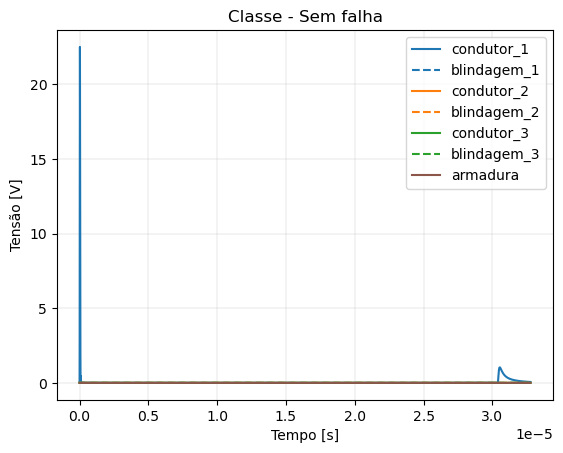

In [7]:
viz_data(df)
#plt.savefig("fig.png")
#plt.xlim((0, 500 * 2.5e-10))